# **Fittlyf Data Science Assignment**
This python notebook contains the seven assignements/tasks given during the interview process of Fittlyf for the position of a Data Science Intern. 


## *Importing the dependencies:*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## *Reading the data:*

Taking the given data "unemployment_analysis.csv" as input, as a pandas dataframe:

In [ ]:
df = pd.read_csv('/content/unemployment_analysis.csv')

Converting strings into floats (6.8 lacs to 6.8) for all the columns containing years: 

*Here, we define a function 'convert_to_float' which takes a string as input, and then splits the strings on the whitespace. It, then converts the first part of the string into a float and returns it.*

In [ ]:
def convert_to_float(year_str):
    try:
        return float(year_str.split()[0])
    except:
        return year_str

*Now, for every column where the column name is numeric, we apply the 'convert_to_float' function.*

In [ ]:
for column in df.columns:
    if column.isnumeric():
        df[column] = df[column].apply(convert_to_float)

*Below is the dataframe where all the year-strings have been converted into float values.*

In [ ]:
df

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


Displaying the column names with their datatypes: 

In [ ]:
print(df.dtypes)

Country Name     object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


Generating the unique country names along with their corresponding country code: 

*Here, we create a new pandas dataframe named 'country_df' which contains only two coumns, country name and country code.*

In [ ]:
country_df = df[['Country Name', 'Country Code']]

*We will drop the duplicate row values from the columns to generate only unique values of country name/code.*

In [ ]:
country_df = country_df.drop_duplicates()
country_df

,Country Name,Country Code
0,Africa Eastern and Southern,AFE
1,Afghanistan,AFG
2,Africa Western and Central,AFW
3,Angola,AGO
4,Albania,ALB
...,...,...
230,Samoa,WSM
231,"Yemen, Rep.",YEM
232,South Africa,ZAF
233,Zambia,ZMB


Finding all the unemployed people throughout all the years, for each country: 

*The function 'unemployment_sum' separates the columns having float values, and then returns the sum of all the columns, for each row, along with the corresponding country name.*

In [ ]:
def row_sum(row):
    num_cols = [col for col in df.columns if col.isnumeric()]
    row_sum = row[num_cols].sum()
    return pd.Series({'Country Name': row['Country Name'], 'Unemployed People': row_sum})

*We store the sum of all the row values in 'sums'and then print that.*

In [ ]:
unemployment_sum_df = df.apply(row_sum, axis=1)
unemployment_sum_df

,Country Name,Unemployed People
0,Africa Eastern and Southern,224.57
1,Afghanistan,345.38
2,Africa Western and Central,153.27
3,Angola,169.02
4,Albania,505.86
...,...,...
230,Samoa,180.98
231,"Yemen, Rep.",365.60
232,South Africa,875.21
233,Zambia,407.96


## *Data Cleaning:*

### **Task 1:**
Write a function in python called data_cleaning() which, when called, would perform the following activity:
1. Find for any missing value in all the columns, display them. If any missing value exists, then replace them with the average of the corresponding country. Then, again, check for null values.
2. For the countries ‘Benin’, ‘Bahrain’, find if any outliers exist. If yes, replace them with mean/median/mode.
3. Create a new column, named, “Year”, which would have all the years as per each country & beside that column, add a new one named, “No. of unemployed”, which would have the corresponding total values.
4. Change the column name “Country Name” to “Country_name” & “Country Code” to “Country_code”.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def data_cleaning(df):
    # Rename columns
    df.rename(columns={'Country Name': 'Country_name', 'Country Code': 'Country_code'}, inplace=True)
    
    # Check for missing values
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]
    print("Missing Values:\n", missing_cols)

    # finding the rows which contain the missing column values
    missing_rows = df[df.isnull().any(axis=1)]

    # Replace missing values with mean of row (excluding string columns and missing values)
    for index, row in missing_rows.iterrows():
        for col in missing_cols.index:
            if pd.isnull(row[col]) and df[col].dtype != 'object':
                # Exclude missing values and non-numeric values from mean calculation
                row_mean = np.mean(pd.to_numeric(row, errors='coerce').dropna())
                df.loc[index, col] = row_mean
    
    # Check for missing values
    missing_values = df.isnull().sum()
    missing_cols = missing_values[missing_values > 0]
    print(missing_cols)

    
    # Replace outliers in 'Benin' and 'Bahrain' with median of corresponding row values
    for country in ['Benin', 'Bahrain']:
        for year in range(1991, 2022):
            median = np.median(df.loc[(df['Country_name'] == country) & (df[str(year)].notnull()), str(year)])
            q1, q3 = np.percentile(df.loc[(df['Country_name'] == country) & (df[str(year)].notnull()), str(year)], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            if lower_bound <= median <= upper_bound:
                df.loc[(df['Country_name'] == country) & (df[str(year)].notnull()), str(year)] = median
            else:
                df.loc[(df['Country_name'] == country) & (df[str(year)].notnull()), str(year)] = df.loc[(df['Country_name'] == country) & (df[str(year)].notnull()), str(year)].mode()[0]
    
    # Create 'Year' and 'No. of Unemployed' columns
    years = [str(year) for year in range(1991, 2022)]
    new_df = pd.DataFrame(columns=['Country_name', 'Country_code', 'Year', 'No. of unemployed'])
    for country in df['Country_name'].unique():
        for year in years:
            new_row = {'Country_name': country, 'Country_code': df.loc[df['Country_name'] == country, 'Country_code'].iloc[0], 'Year': year, 'No. of unemployed': df.loc[df['Country_name'] == country, year].iloc[0]}
            new_df = new_df.append(new_row, ignore_index=True)
    
    return new_df


In [ ]:
new_df = data_cleaning(df)

Missing Values:
 2000    1
2015    1
dtype: int64
Series([], dtype: int64)


Streaming output truncated to the last 5000 lines.
<ipython-input-14-2aaeacf9d173>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-2aaeacf9d173>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-2aaeacf9d173>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-2aaeacf9d173>:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-14-2aaeacf9d173>:50: FutureWarning: The frame.

In [ ]:
new_df

,Country_name,Country_code,Year,No. of unemployed
0,Africa Eastern and Southern,AFE,1991,7.80
1,Africa Eastern and Southern,AFE,1992,7.84
2,Africa Eastern and Southern,AFE,1993,7.85
3,Africa Eastern and Southern,AFE,1994,7.84
4,Africa Eastern and Southern,AFE,1995,7.83
...,...,...,...,...
7280,Zimbabwe,ZWE,2017,4.78
7281,Zimbabwe,ZWE,2018,4.80
7282,Zimbabwe,ZWE,2019,4.83
7283,Zimbabwe,ZWE,2020,5.35


### **Task 2:**
Write a function called descriptive_stats(country_code) which would –
1. Give the mean, median, mode & standard deviation for the parametrized country over all the years. [e.g., descriptive_stats(‘WSM’) would give the descriptive statistics of this country.]
2. Give the year during which the country’s (of the passed country_code) unemployment was minimum & maximum.
3. Find the top 5 countries which had maximum unemployment in 2021.
4. Find the top 3 countries that had unemployment greater than 5 lacs in the year 2021.
5. Calculate the change (in percentage) the countries (from ques. 3) saw in unemployment starting from 1991 to 2021 (year on year). [for e.g., change_1 = (1991_value – 1992_value.)/1991_value, change_2 = (1992_val – 1993_val)/1992_val & so on.]


In [ ]:
def descriptive_stats(country_code):
    # Filter data for the given country
    country_data = new_df[new_df['Country_code'] == country_code]
    
    # Compute mean, median, mode, and standard deviation
    mean = country_data['No. of unemployed'].mean()
    median = country_data['No. of unemployed'].median()
    mode = country_data['No. of unemployed'].mode().values[0]
    std = country_data['No. of unemployed'].std()
    
    print(f"Descriptive statistics for {country_code}:")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print(f"Standard deviation: {std:.2f}")
    
    # Find year with minimum and maximum unemployment
    min_year = country_data.loc[country_data['No. of unemployed'].idxmin(), 'Year']
    max_year = country_data.loc[country_data['No. of unemployed'].idxmax(), 'Year']
    
    print(f"\nYear with minimum unemployment for {country_code}: {min_year}")
    print(f"Year with maximum unemployment for {country_code}: {max_year}")
    
    # Find top 5 countries with maximum unemployment in 2021
    top_5_countries = new_df[new_df['Year'] == '2021'].sort_values('No. of unemployed', ascending=False).head(5)['Country_name'].values
    print(f"\nTop 5 countries with maximum unemployment in 2021: {', '.join(top_5_countries)}")
    
    # Find top 3 countries with unemployment greater than 5 lacs in 2021
    top_3_countries = new_df[(new_df['Year'] == '2021') & (new_df['No. of unemployed'] > 500000)].sort_values('No. of unemployed', ascending=False).head(3)['Country_name'].values
    print(f"\nTop 3 countries with unemployment greater than 5 lacs in 2021: {', '.join(top_3_countries)}")
    
    # Calculate year-on-year change in unemployment
    for year in range(1991, 2021):
        current_val = country_data.loc[country_data['Year'] == str(year), 'No. of unemployed'].values[0]
        next_val = country_data.loc[country_data['Year'] == str(year+1), 'No. of unemployed'].values[0]
        change = ((current_val - next_val) / current_val) * 100
        print(f"\nYear-on-year change in unemployment for {country_code} from {year} to {year+1}: {change:.2f}%")


In [ ]:
descriptive_stats('USA')

Descriptive statistics for USA:
Mean: 5.91
Median: 5.53
Mode: 4.62
Standard deviation: 1.62

Year with minimum unemployment for USA: 2019
Year with maximum unemployment for USA: 2010

Top 5 countries with maximum unemployment in 2021: South Africa, Djibouti, Eswatini, West Bank and Gaza, Botswana

Top 3 countries with unemployment greater than 5 lacs in 2021: 

Year-on-year change in unemployment for USA from 1991 to 1992: -10.29%

Year-on-year change in unemployment for USA from 1992 to 1993: 8.00%

Year-on-year change in unemployment for USA from 1993 to 1994: 11.30%

Year-on-year change in unemployment for USA from 1994 to 1995: 7.68%

Year-on-year change in unemployment for USA from 1995 to 1996: 3.54%

Year-on-year change in unemployment for USA from 1996 to 1997: 8.26%

Year-on-year change in unemployment for USA from 1997 to 1998: 9.80%

Year-on-year change in unemployment for USA from 1998 to 1999: 6.43%

Year-on-year change in unemployment for USA from 1999 to 2000: 5.45%

Yea

## *Prescriptive Statistics:*

**Ques 1.** After getting statistics for a country over all years, can you tell in which year the country having country_code ‘BGR’ had the minimum unemployment issue?

In [ ]:
# Running the descriptive_stats function for 'BGR'
descriptive_stats('BGR')

Descriptive statistics for BGR:
Mean: 10.92
Median: 11.26
Mode: 11.10
Standard deviation: 4.06

Year with minimum unemployment for BGR: 2019
Year with maximum unemployment for BGR: 2001

Top 5 countries with maximum unemployment in 2021: South Africa, Djibouti, Eswatini, West Bank and Gaza, Botswana

Top 3 countries with unemployment greater than 5 lacs in 2021: 

Year-on-year change in unemployment for BGR from 1991 to 1992: -37.84%

Year-on-year change in unemployment for BGR from 1992 to 1993: -7.19%

Year-on-year change in unemployment for BGR from 1993 to 1994: 21.95%

Year-on-year change in unemployment for BGR from 1994 to 1995: 13.28%

Year-on-year change in unemployment for BGR from 1995 to 1996: -12.61%

Year-on-year change in unemployment for BGR from 1996 to 1997: -9.60%

Year-on-year change in unemployment for BGR from 1997 to 1998: 10.95%

Year-on-year change in unemployment for BGR from 1998 to 1999: -15.57%

Year-on-year change in unemployment for BGR from 1999 to 2000:

*From the above output, we can see that the country with the country code 'BGR' had minimum unemployment issues in the year 2009. From 2009 to 2010, the change in unemployment rates were -50% which shows that the country's employment rates were increasing during 2009.*

**Ques 2.** Create a new dataframe which would give us the country names along with their corresponding country codes. We would also have a new column along each country which would give us the increase or decrease percentage in unemployment that each country saw from 1991 to 2021.


In [ ]:
# calculating the change in percentage in unemployment for each country from 1991 to 2021
change = (new_df['No. of unemployed'].iloc[-1] - new_df['No. of unemployed'].iloc[0]) / new_df['No. of unemployed'].iloc[0] * 100

# Calculate change in unemployment for each country
change = []
for country in new_df['Country_name'].unique():
    country_df = new_df[new_df['Country_name'] == country]
    change.append((country, country_df['Country_code'].iloc[0], (country_df['No. of unemployed'].iloc[-1] - country_df['No. of unemployed'].iloc[0]) / country_df['No. of unemployed'].iloc[0] * 100))

# Create new dataframe
df_change = pd.DataFrame(change, columns=['Country_name', 'Country_code', 'Change'])

# Sort by change in unemployment in descending order
df_change.sort_values(by='Change', ascending=False, inplace=True)


In [ ]:
df_change

,Country_name,Country_code,Change
8,Armenia,ARM,1206.250000
107,Kyrgyz Republic,KGZ,810.000000
21,Belarus,BLR,690.000000
11,Azerbaijan,AZE,631.111111
125,Lithuania,LTU,618.181818
...,...,...,...
120,Sri Lanka,LKA,-63.233288
45,Cuba,CUB,-65.063291
176,Qatar,QAT,-67.901235
166,Poland,POL,-74.036980


**Ques 3.** Can you compare between the minimum unemployment seen over all years for the country ‘Japan’, with the value seen in the previous & next 1 year of that year? Write a brief note on the same.


In [ ]:
# calling the descriptive_stats function for Japan 
descriptive_stats('JPN')

Descriptive statistics for JPN:
Mean: 3.76
Median: 3.89
Mode: 2.80
Standard deviation: 1.00

Year with minimum unemployment for JPN: 1991
Year with maximum unemployment for JPN: 2002

Top 5 countries with maximum unemployment in 2021: South Africa, Djibouti, Eswatini, West Bank and Gaza, Botswana

Top 3 countries with unemployment greater than 5 lacs in 2021: 

Year-on-year change in unemployment for JPN from 1991 to 1992: -4.76%

Year-on-year change in unemployment for JPN from 1992 to 1993: -13.64%

Year-on-year change in unemployment for JPN from 1993 to 1994: -16.00%

Year-on-year change in unemployment for JPN from 1994 to 1995: -10.34%

Year-on-year change in unemployment for JPN from 1995 to 1996: -6.25%

Year-on-year change in unemployment for JPN from 1996 to 1997: 0.00%

Year-on-year change in unemployment for JPN from 1997 to 1998: -20.59%

Year-on-year change in unemployment for JPN from 1998 to 1999: -14.63%

Year-on-year change in unemployment for JPN from 1999 to 2000: -

*According to the available data, Japan witnessed its lowest unemployment rate during the 2008-2009 period, which showed a remarkable increase of 26.75% in employment rate. The preceding year, i.e., 2007, the unemployment rate in Japan was recorded as -2.83%, indicating a significant increase in job opportunities within a year. In the subsequent year of 2009-2010, the unemployment rate dropped further to -0.59%, highlighting a continued upward trend in employment rates. It is noteworthy that Japan's significant increase in employment occurred during a period that coincided with a global economic recession. The fact that the country managed to achieve a substantial reduction in unemployment rates during this challenging economic period reflects positively on Japan's economic resilience and policy effectiveness. Interestingly, this period coincides with the global recession that affected many countries around the world. It's important to note that Japan's labor market has unique features, such as high job security, long-term employment relationships, and a low willingness to hire and fire employees. These factors, along with Japan's strong government policies and support systems, may have contributed to the country's employment rates increasing during the recession. Japan's government implemented measures such as employment retention subsidies, which provided financial assistance to companies that retained their employees during the economic downturn, and other initiatives aimed at maintaining job security for workers. Additionally, the government's stimulus package aimed to encourage consumer spending and support small and medium-sized businesses also played a role in stabilizing Japan's economy during the recession. Overall, Japan's unique labor market, coupled with strong government support, helped the country weather the global economic crisis and even experience a boom in employment rates.*

**Ques 4.** Among ‘MDA’, ‘NAC’, ‘PAN’, ‘PAK’, ‘UGA’ which countries saw a huge jump in the unemployment numbers from 2019 to 2021, in both upward & downward direction separately?


In [ ]:
# Create a list of countries to analyze
countries = ['MDA', 'NAC', 'PAN', 'PAK', 'UGA']

def upward_downward_change(countries) :
    # Calculate change in unemployment for each country
    change = []
    for country in countries:
        country_df = new_df[new_df['Country_code'] == country]
        if len(country_df) < 2:
            continue
        change.append((country, (country_df['No. of unemployed'].iloc[-1] - country_df['No. of unemployed'].iloc[-3]) / country_df['No. of unemployed'].iloc[-3] * 100))

    # Create new dataframe
    df_change = pd.DataFrame(change, columns=['Country_code', 'Change'])

    # Sort by change in unemployment in descending order
    df_change.sort_values(by='Change', ascending=False, inplace=True)

    # Print results
    print(df_change)


In [ ]:
upward_downward_change(countries)

  Country_code      Change
2          PAN  155.602537
4          UGA   53.125000
1          NAC   46.529563
3          PAK   22.881356
0          MDA  -22.352941


*Countries which saw a jump in unemployment rates in upward direction are: Panama, Pakistan, North America and Uganda.
The only country which saw a decrease in unployment rates is Moldova.*

**Ques 5.** What would you say about the change in percentage seen from 1991 to 2021 for the country ‘LSO’? Was it a predictable upward/downward movement? [ To see that, you may have to plot the numbers for all the years for ‘LSO’.]


In [ ]:
#calling the descriptive_stats function 
descriptive_stats('LSO')

Descriptive statistics for LSO:
Mean: 30.40
Median: 30.46
Mode: 22.44
Standard deviation: 5.54

Year with minimum unemployment for LSO: 2019
Year with maximum unemployment for LSO: 1997

Top 5 countries with maximum unemployment in 2021: South Africa, Djibouti, Eswatini, West Bank and Gaza, Botswana

Top 3 countries with unemployment greater than 5 lacs in 2021: 

Year-on-year change in unemployment for LSO from 1991 to 1992: -0.75%

Year-on-year change in unemployment for LSO from 1992 to 1993: -0.96%

Year-on-year change in unemployment for LSO from 1993 to 1994: -0.65%

Year-on-year change in unemployment for LSO from 1994 to 1995: -0.97%

Year-on-year change in unemployment for LSO from 1995 to 1996: -0.67%

Year-on-year change in unemployment for LSO from 1996 to 1997: -0.93%

Year-on-year change in unemployment for LSO from 1997 to 1998: 2.06%

Year-on-year change in unemployment for LSO from 1998 to 1999: 2.18%

Year-on-year change in unemployment for LSO from 1999 to 2000: 2.45

In [ ]:
#looking at the df_change dataframe which contains the change in percentage for all the countries. 
LSO_change = df_change.loc[df['Country_code'] == 'LSO']
print(LSO_change)

    Country_name Country_code     Change
123      Lesotho          LSO -31.893688


*The change in percentage of unemployment rates from 1991-2021 for the country Lesotho, show that the unemployment rates went down, meaning that the country witnessed a growth in their employment market.*

*Looking at the change in percentage of unemployment rates year-by-year for Lethoso, we can observe that the unemployment rates were increasing steadily year-by-year until it reach a peak of around 3.35%, and then the unemplyment rates started decreasing after the year 2010.*

*Since the unemployment rates can be seen increasing in the year-by-year outputs for the majority part, the negative change in unemployment rates for the years 1991-2021 is unpredictable. According to me, the change should have been postive as the unemployment rates were going up.*

## *Simple Machine Learning Questions:*

In [ ]:
def predict_future(n_years):

    # Create new dataframe for machine learning
    ml_df = new_df.copy()
    ml_df['No. of unemployed'] = ml_df['No. of unemployed'].astype(int)

    # Calculate moving average and append to dataframe
    ma_df = ml_df.groupby('Country_name')['No. of unemployed'].rolling(window=3).mean().reset_index()
    ml_df['Moving_avg'] = ma_df['No. of unemployed'].fillna(method='ffill')

    # Define function to fit ARIMA model and make predictions
    def arima_predict(df, order=(1, 1, 1)):
        predictions = []
        for country in df['Country_name'].unique():
            country_df = df[df['Country_name'] == country]
            train_df = country_df[country_df['Year'] <= 2021]
            test_years = range(2022, 2022 + n_years)
            if len(test_years) == 0:
                continue
            model = ARIMA(train_df['No. of unemployed'], order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test_years))
            predictions.append(pd.DataFrame({
                'Country_name': [country] * len(test_years),
                'Country_code': [country_df['Country_code'].iloc[0]] * len(test_years),
                'Year': test_years,
                'ARIMA': forecast.values.flatten()
            }))
        if len(predictions) == 0:
            return None
        else:
            return pd.concat(predictions)
            
    # Convert Year column to integer data type
    ml_df['Year'] = ml_df['Year'].astype(int)

    # Fit ARIMA models and append predictions to dataframe
    arima_pred_df = arima_predict(ml_df, order=(1, 1, 1))
    if arima_pred_df is not None:
        ml_df = ml_df.append(arima_pred_df, ignore_index=True)
    ml_df['Moving_avg_2'] = ml_df.groupby('Country_name')['No. of unemployed'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)

    # Fill missing values with last available value
    ml_df.fillna(method='ffill', inplace=True)

    # Calculate mean absolute percentage error of models
    ml_df['Year'] = ml_df['Year'].astype(int)
    mape_ma = np.mean(np.abs(ml_df[ml_df['Year']<=2021]['No. of unemployed'] - ml_df[ml_df['Year']<=2021]['Moving_avg']) / (ml_df[ml_df['Year']<=2021]['No. of unemployed']+1e-8)) * 100
    mape_ma2 = np.mean(np.abs(ml_df[ml_df['Year']<=2021]['No. of unemployed'] - ml_df[ml_df['Year']<=2021]['Moving_avg_2']) / (ml_df[ml_df['Year']<=2021]['No. of unemployed']+1e-8)) * 100
    mape_arima = np.mean(np.abs(ml_df[ml_df['Year']<=2021]['No. of unemployed'] - ml_df[ml_df['Year']<=2021]['ARIMA']) / (ml_df[ml_df['Year']<=2021]['No. of unemployed']+1e-8)) * 100

    print(f"MAPE for Moving Average (3yrs): {mape_ma:.2f}%")
    print(f"MAPE for Moving Average (all available yrs): {mape_ma2:.2f}%")
    print(f"MAPE for ARIMA: {mape_arima:.2f}%")

    # Plot line graph of actual and predicted values for total number of unemployed across all countries
    fig, ax = plt.subplots(figsize=(10, 6))
    actual_total = ml_df[ml_df['Year'] <= 2021].groupby('Year')['No. of unemployed'].sum()
    predicted_total = ml_df[ml_df['Year'] > 2021].groupby('Year')['ARIMA'].sum()
    ax.plot(actual_total.index, actual_total, label='Actual')
    ax.plot(predicted_total.index, predicted_total, label='Predicted', linestyle='dashed')
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('No. of unemployed')
    ax.set_title('Actual vs Predicted Unemployment (Total)')
    plt.show()

   # Calculate maximum and minimum unemployed for each country in each future year
    for year in range(2022, 2022 + n_years):
        year_df = ml_df[ml_df['Year'] == year]
        agg_unemployed = pd.DataFrame(columns=['Country_name', 'Min', 'Max'])
        for country in year_df['Country_name'].unique():
            country_df = year_df[year_df['Country_name'] == country]
            country_min = country_df['No. of unemployed'].min()
            country_max = country_df['No. of unemployed'].max()
            agg_unemployed = agg_unemployed.append({'Country_name': country, 'Min': country_min, 'Max': country_max}, ignore_index=True)
        agg_unemployed.set_index('Country_name', inplace=True)
        agg_unemployed = agg_unemployed.replace([np.inf, -np.inf], np.nan).fillna('N/A')
        print(f"\nYear {year}\n")
        print(f"\nUnemployment statistics:\n{agg_unemployed.to_string()}\n")


    # Determine which future year has maximum overall unemployment
    max_year = ml_df.groupby('Year')['No. of unemployed'].sum().idxmax()
    print(f"\n{max_year} has maximum overall unemployment\n")

    # Find countries where unemployment in 2022 is greater than in 2021
    unemployment_2022 = ml_df[ml_df['Year'] == 2022].set_index('Country_name')['No. of unemployed']
    unemployment_2021 = ml_df[ml_df['Year'] == 2021].set_index('Country_name')['No. of unemployed']
    increase_2022 = unemployment_2022[unemployment_2022 > unemployment_2021]
    if increase_2022.empty:
        print("No countries have an increase in unemployment in 2022 compared to 2021")
    else:
        print("The following countries have an increase in unemployment in 2022 compared to 2021:\n")
        print(increase_2022.index.tolist())

    # Return all the observations
    return ml_df



MAPE for Moving Average (3yrs): 1140098043.57%
MAPE for Moving Average (all available yrs): 16929771.81%
MAPE for ARIMA: nan%


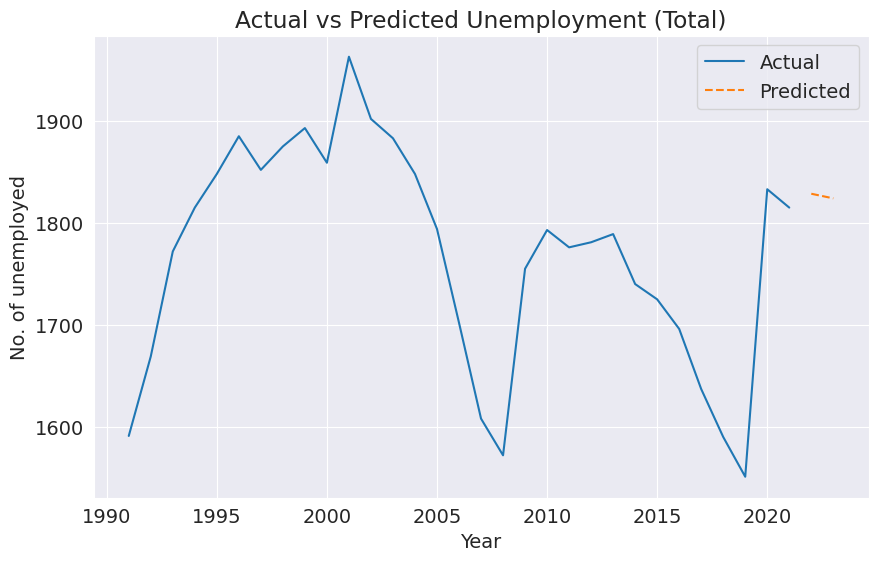


Year 2022


Unemployment statistics:
                                                      Min  Max
Country_name                                                  
Africa Eastern and Southern                           5.0  5.0
Afghanistan                                           5.0  5.0
Africa Western and Central                            5.0  5.0
Angola                                                5.0  5.0
Albania                                               5.0  5.0
Arab World                                            5.0  5.0
United Arab Emirates                                  5.0  5.0
Argentina                                             5.0  5.0
Armenia                                               5.0  5.0
Australia                                             5.0  5.0
Austria                                               5.0  5.0
Azerbaijan                                            5.0  5.0
Burundi                                               5.0  5.0
Belgium          

In [ ]:
ml_df = predict_future(2)

## *Visualization:*

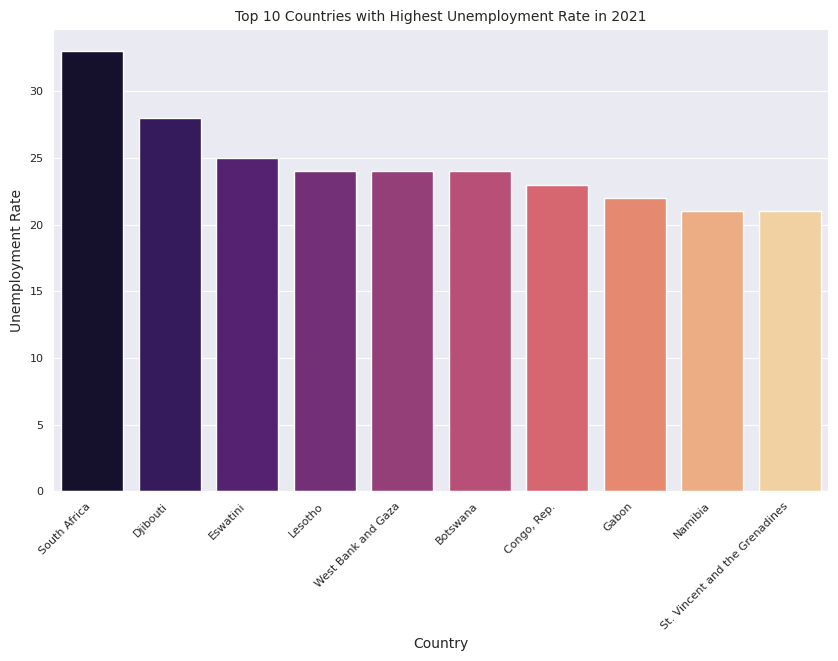

In [ ]:
# Get the top 10 countries with highest unemployment rate in 2021
top_10_unemp = ml_df[ml_df['Year'] == 2021].sort_values(by='No. of unemployed', ascending=False).head(10)

# Plot bar graph using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Country_name', y='No. of unemployed', data=top_10_unemp, palette='magma')
plt.title('Top 10 Countries with Highest Unemployment Rate in 2021', fontsize=10)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Unemployment Rate', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

*From the above bar graph, we can see that the top 10 countries with the highest unemployment rate in 2021 include South Africa, Djibouti, Eswatini, Lesotho and many more.*

In [ ]:
ml_df = ml_df.sort_values(by=['Country_name', 'Year'], ascending=True)
ml_df

,Country_name,Country_code,Year,No. of unemployed,Moving_avg,ARIMA,Moving_avg_2
31,Afghanistan,AFG,1991,10.0,11.666667,NaN,10.000000
32,Afghanistan,AFG,1992,10.0,11.666667,NaN,10.000000
33,Afghanistan,AFG,1993,10.0,7.000000,NaN,10.000000
34,Afghanistan,AFG,1994,10.0,7.000000,NaN,10.000000
35,Afghanistan,AFG,1995,11.0,7.000000,NaN,10.333333
...,...,...,...,...,...,...,...
7282,Zimbabwe,ZWE,2019,4.0,4.000000,NaN,4.000000
7283,Zimbabwe,ZWE,2020,5.0,4.333333,NaN,4.333333
7284,Zimbabwe,ZWE,2021,5.0,4.666667,NaN,4.666667
7753,Zimbabwe,ZWE,2022,5.0,4.666667,4.930979,5.000000


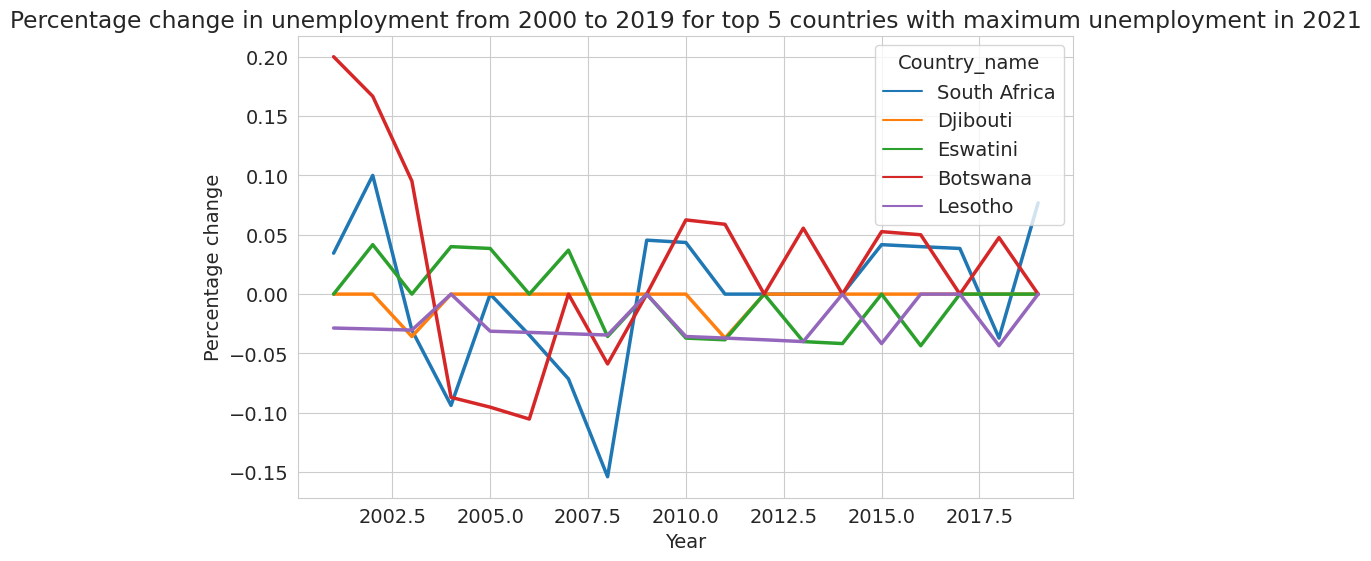

In [ ]:
# Filter for the year range 2000-2019
ml_df_2000_2019 = ml_df[(ml_df['Year']>=2000) & (ml_df['Year']<=2019)]

# Get the top 5 countries with maximum unemployment in 2021
top_5_countries = ml_df[ml_df['Year']==2021].sort_values('No. of unemployed', ascending=False).head(5)['Country_name'].values

# Calculate percentage change year on year for each country
country_dfs = []
for country in top_5_countries:
    country_df = ml_df_2000_2019[ml_df_2000_2019['Country_name']==country]
    country_df['pct_change'] = country_df['No. of unemployed'].pct_change()
    country_dfs.append(country_df)

# Concatenate all country dataframes
concatenated_df = pd.concat(country_dfs)

# Plot the line graph
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=concatenated_df, x='Year', y='pct_change', hue='Country_name', linewidth=2.5)
plt.title('Percentage change in unemployment from 2000 to 2019 for top 5 countries with maximum unemployment in 2021')
plt.xlabel('Year')
plt.ylabel('Percentage change')
plt.show()

*Upon analyzing the above line graph that illustrates the percentage change in unemployment rates from the year 2000 to 2019 for the top five countries with the highest levels of unemployment in the year 2021, we can observe some noteworthy insights. Namely, it is evident that throughout the examined period, which spans two decades, the vast majority of unemployment rates for all five of these countries remained within the range of -0.05 to 0.05.*

*This trend serves to highlight the unfortunate reality that these nations, namely South Africa, Djibouti, Eswatini, Botswana, and Lesotho, have experienced consistently weak employment opportunities. The prolonged and stagnant levels of unemployment in these countries are indicative of a greater socio-economic issue, which may be attributed to a range of factors such as underdeveloped industries, lack of education and skills training, and limited access to job opportunities, among others.*

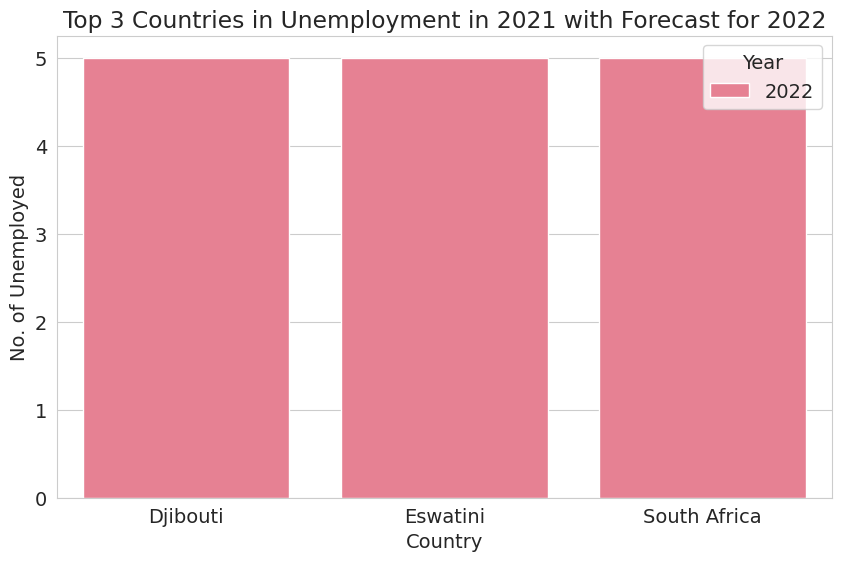

In [ ]:
# Filter data for 2021 and 2022
ml_df_21_22 = ml_df[(ml_df['Year'] >= 2021) & (ml_df['Year'] <= 2022)]

# Group data by country name and calculate the total number of unemployed for each country in 2021
unemployed_2021 = ml_df_21_22[ml_df_21_22['Year'] == 2021].groupby('Country_name')['No. of unemployed'].sum()

# Sort countries by the number of unemployed in 2021 and select the top 3
top_countries = unemployed_2021.sort_values(ascending=False).head(3)

# Filter data for the top 3 countries and 2022
top_countries_df = ml_df_21_22[(ml_df_21_22['Country_name'].isin(top_countries.index)) & (ml_df_21_22['Year'] == 2022)]

# Create a bar plot
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries_df, x='Country_name', y='No. of unemployed', hue='Year')
plt.title('Top 3 Countries in Unemployment in 2021 with Forecast for 2022')
plt.xlabel('Country')
plt.ylabel('No. of Unemployed')
plt.show()


*From the above bar graph, we can observe that the unemployment rates for the three countries do not change by significantly large values, and the unemployment rate remains nearly the same.*

*When we see that the unemployment rates in these countries are not changing significantly, it could imply that there may be a lack of new job opportunities being created. This means that there could be fewer jobs available in the market, which makes it difficult for people who are seeking employment to find suitable work.*

*Moreover, if there is a sustained high level of unemployment, it can also have negative economic effects. For example, it can lead to a decrease in consumer spending and economic growth, which can ultimately result in a decrease in tax revenues and government spending. Thus, while a stable unemployment rate may not seem like a cause for concern on the surface, it is essential to address the underlying causes of unemployment and work towards creating new job opportunities to support sustainable economic growth and development.*

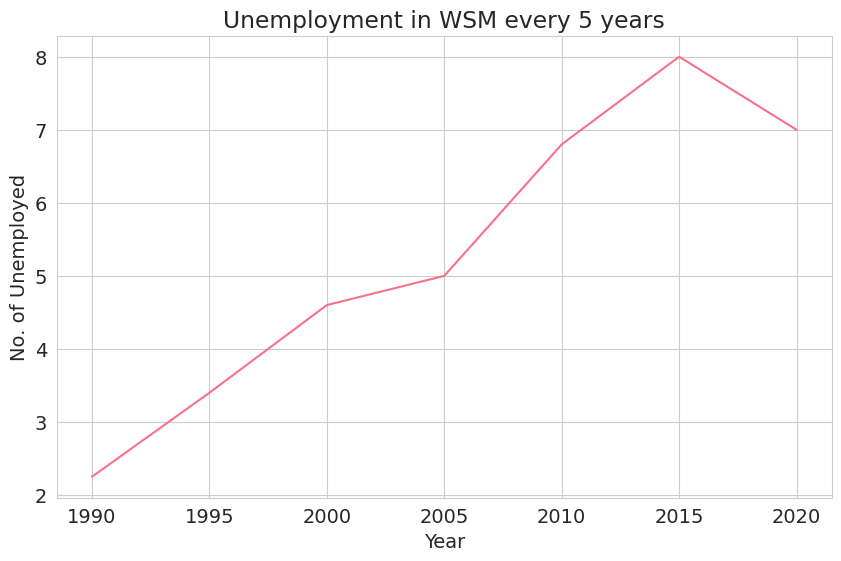

In [ ]:
# Filter the data for the country code 'WSM'
wsm_data = ml_df[(ml_df['Country_code'] == 'WSM')]

# Group the data by year and calculate the mean of the No. of unemployed column
grouped_data = wsm_data.groupby((wsm_data['Year'] // 5) * 5).mean()

# Create a line graph of the data
plt.plot(grouped_data.index, grouped_data['No. of unemployed'])
plt.xlabel('Year')
plt.ylabel('No. of Unemployed')
plt.title('Unemployment in WSM every 5 years')
plt.show()


*The above line graph shows the change in unemployment in WSM (Samoa) through 1991-2021.*

*We can observe that the unemployment rate has only increased with a constant rate from 1991 to 2015. After 2015, the unemployment rate in Samoa started decreasing.* 

*From this, we can conclude that there was likely a lack of job opportunities in Samoa prior to 2015, which led to a consistent increase in the unemployment rate. This could be due to various reasons such as a lack of investment, insufficient infrastructure, or limited industries that offer jobs.*

*However, the decreasing trend in the unemployment rate after 2015 suggests that some efforts may have been made to improve the employment situation in Samoa. This could be due to the government's initiatives to promote job growth, private sector investment, or the development of new industries.*

## *Projects:* 

I have completed a variety of data science projects that involved exploratory data analysis (EDA), as well as classification and regression tasks. One such project was a machine learning endeavor where I employed Python and its various libraries, including Pandas, Numpy, Matplotlib, and Scikit-Learn, to classify different red wines from around the world based on quality.

At present, I am engaged in a research-based project called Sentimindle. It involves conducting sentiment analysis and providing product recommendations for the Kindle Store reviews of e-books on Amazon. The objective of this research is to explore the sentiments expressed by customers in their reviews, identify the most common sentiments, and ascertain the factors that influence them. The insights obtained from this study could be of immense value to e-book sellers on Amazon, helping them to improve their marketing strategies, enhance the customer experience, and drive sales.

I am planning to utilize various machine learning and deep learning techniques, including Logistic Regression, Multinomial Naive Bayes, LinearSVC, Convolutional Neural Networks, LSTM, and GRU. Additionally, I intend to incorporate a pre-trained transformer-based deep learning architecture, BERT, to further enhance the project.

Here are the GitHub links for both the projects: 
1. https://github.com/AnushkaGupta18/Sentimindle
2. https://github.com/AnushkaGupta18/Classification-Models-for-Red-Wine-Dataset

Other than these, I have done various other projects in the field of Data Science which can be found on my GitHub Profile. 

## *Time Management:*

As a third-year B.Tech student in Computer Science, I am thrilled at the opportunity to apply for a full-time remote internship at Fittlyf. Time management has always been a crucial part of my academic and personal life, and I believe that it will be vital to my success in this internship.

If selected, I will create a detailed schedule that outlines my daily tasks and assignments, allocating specific hours for each task. I will prioritize my responsibilities and ensure that I complete them before the deadline. This will help me avoid any last-minute stress and ensure that I deliver high-quality work.

To ensure that I am productive and focused during the day, I will maintain a healthy work-life balance. This includes taking breaks, exercising regularly, and spending time with my family and friends. I believe that this will help me stay motivated and maintain my productivity throughout the day.

I am confident that my time management skills, coupled with my passion for computer science, will allow me to excel in this internship. I am excited to learn and contribute to the success of Fittlyf.